In [1]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import atmosDensity, Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants
import helpers

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [4]:
coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat()

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.addPerturbation("atmosphere")
%time maneuvers.propagate2(60*60*24*400)

Propagating...from day  0.0  to  400.0
Day:0.0	Height: 504.48494692123495 km	Mass: 1.0
Day:8.476987256332142e-08	Height: 504.48500158000553 km	Mass: 1.0
Day:1.6953974512664283e-07	Height: 504.485056238601 km	Mass: 1.0
Day:0.0008478682653783407	Height: 505.0223743365789 km	Mass: 1.0
Day:0.0008478682653783407	Height: 505.0223750287704 km	Mass: 1.0
Day:1.0000981102941515	Height: 509.0358717302298 km	Mass: 1.0
Day:1.0000981102941515	Height: 509.0358834882276 km	Mass: 1.0
Day:6.000002588638723	Height: 508.67959289033155 km	Mass: 1.0
Day:6.000002588638723	Height: 508.67878899125384 km	Mass: 1.0
Day:9.000400409946428	Height: 498.28201117659177 km	Mass: 1.0
Day:9.000400409946428	Height: 498.28201127377247 km	Mass: 1.0
Day:10.000494522412668	Height: 506.94879066616295 km	Mass: 1.0
Day:10.000494522412668	Height: 506.94954138275983 km	Mass: 1.0
Day:12.000562023388545	Height: 499.65741630792337 km	Mass: 1.0
Day:12.000562023388545	Height: 499.6595968252672 km	Mass: 1.0
Day:20.000071122378596	Height

<IPython.core.display.Javascript object>


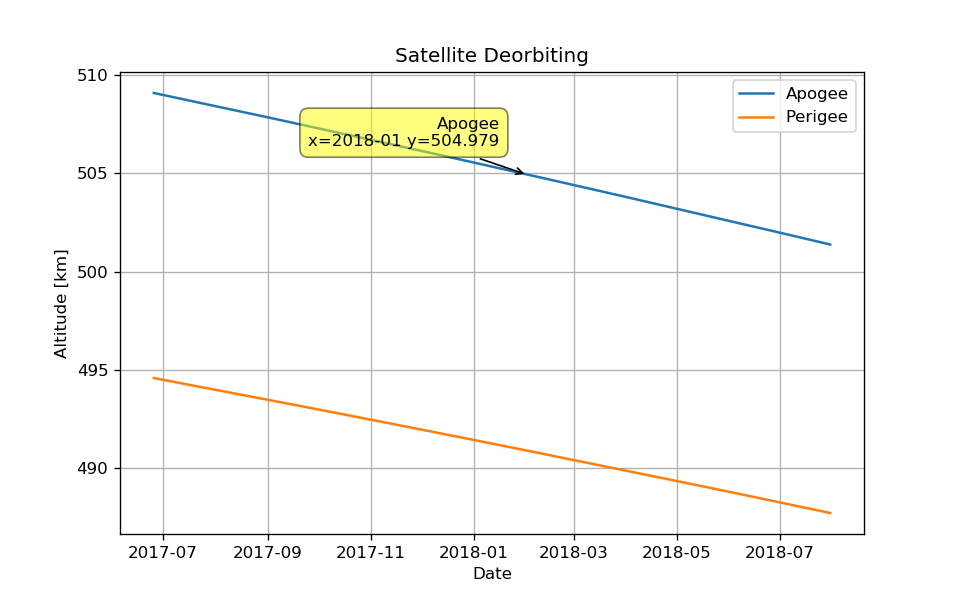

In [5]:
# CALCULATE PERIGEES AND APOGEES
perigees = (1-maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]
apogees = (1+maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]

#PLOTTING
plt.figure(figsize=(8,5))
plt.plot(maneuvers.history.datetime,(apogees-constants.Re)/1e3, label="Apogee");
plt.plot(maneuvers.history.datetime,(perigees-constants.Re)/1e3, label="Perigee");
plt.grid();
plt.legend();
plt.title("Satellite Deorbiting")
plt.ylabel("Altitude [km]")
plt.xlabel("Date")
mplcursors.cursor(hover=True);